In [39]:
import os
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Beneficiary Data - EDA

In [40]:
# Load datasets
train_bene_df = pd.read_csv("../data/raw/train_beneficiary.csv")
train_ip_df = pd.read_csv("../data/raw/train_Inpatient.csv")
train_op_df = pd.read_csv("../data/raw/train_outpatient.csv")

In [41]:
train_bene_df.shape

(138556, 25)

In [42]:
train_bene_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [43]:
train_bene_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


#### 1. Unique Beneficiaries in the dataset

In [44]:
train_bene_df.BeneID.nunique()

138556

### 2. Unique genders

In [45]:
train_bene_df.Gender.nunique()

2

In [46]:
train_bene_df.Gender.value_counts()

Gender
2    79106
1    59450
Name: count, dtype: int64

In [47]:
train_bene_df['Gender'] = train_bene_df['Gender'].apply(lambda val: 0 if val == 2 else 1)

In [48]:
train_bene_df.Gender.value_counts()

Gender
0    79106
1    59450
Name: count, dtype: int64

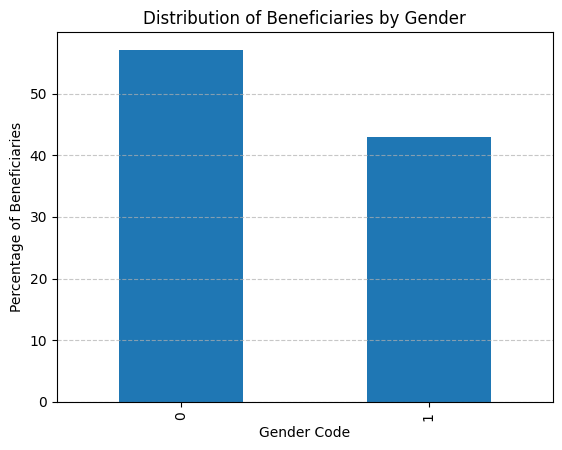

In [50]:
gender_counts = train_bene_df['Gender'].value_counts(normalize=True) * 100

gender_counts.plot(kind='bar')

plt.title("Distribution of Beneficiaries by Gender")
plt.xlabel("Gender Code")
plt.ylabel("Percentage of Beneficiaries")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### 3. DOB year distribution of beneficiary

In [51]:
train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'], format="%Y-%m-%d")

In [ ]:
train_bene_df['Patient_Age_Year'] = train_bene_df['DOB'].dt.year

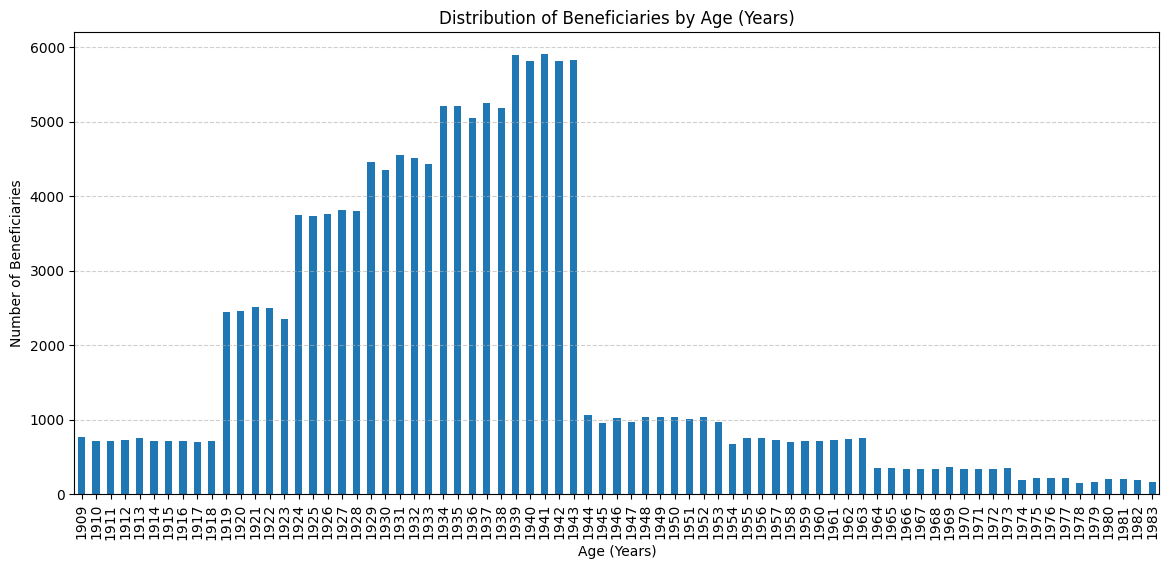

In [55]:
age_counts = train_bene_df['Patient_Age_Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
age_counts.plot(kind='bar')

plt.title("Distribution of Beneficiaries by Age (Years)")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Beneficiaries")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### 4. Whats the gender ratio across Human races?

In [56]:
train_bene_df.Race.value_counts()

Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64

Text(0, 0.5, '% share of beneficiaries')

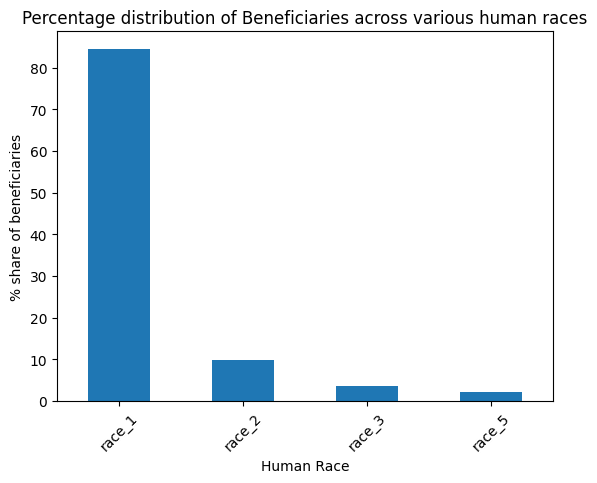

In [69]:
(train_bene_df.Race.value_counts(normalize=True)*100).plot(kind='bar')
plt.title("Percentage distribution of Beneficiaries across various human races")
plt.xlabel("Human Race")
plt.xticks(labels=['race_1', 'race_2', 'race_3', 'race_5'], ticks=[0, 1, 2, 3], rotation=45)
plt.ylabel('% share of beneficiaries')

Text(0.5, 1.0, 'Imbalance of males and females across the human races?\n')

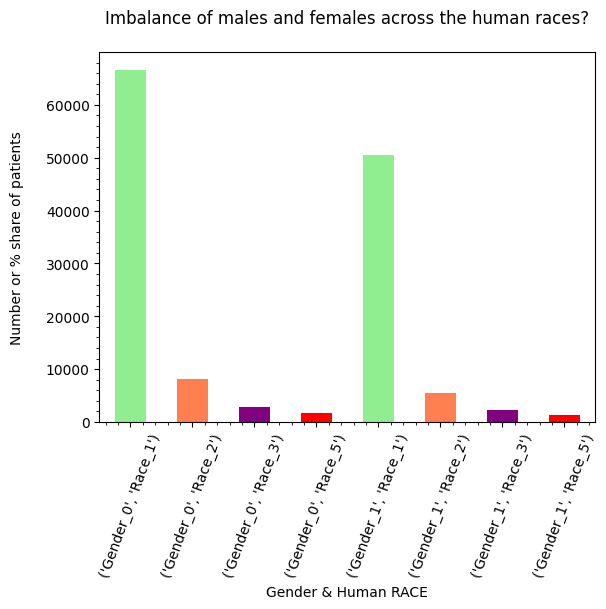

In [65]:
train_bene_df.groupby(['Gender','Race'])['BeneID'].count().plot(kind='bar', color=['lightgreen','coral','purple','red','lightgreen','coral','purple','red'])

plt.xlabel("Gender & Human RACE")
plt.xticks(labels=[("Gender_0","Race_1"), ("Gender_0","Race_2"), ("Gender_0","Race_3"), ("Gender_0","Race_5"),("Gender_1","Race_1"), ("Gender_1","Race_2"), ("Gender_1","Race_3"), ("Gender_1","Race_5")],
            ticks=[0,1,2,3,4,5,6,7], rotation=70)
plt.ylabel("Number or % share of patients\n")
plt.minorticks_on()
plt.title("Imbalance of males and females across the human races?\n")

#### Note: There is no such iimbalance of gender across Rcaes

### 5. Number of Bene with CKD 

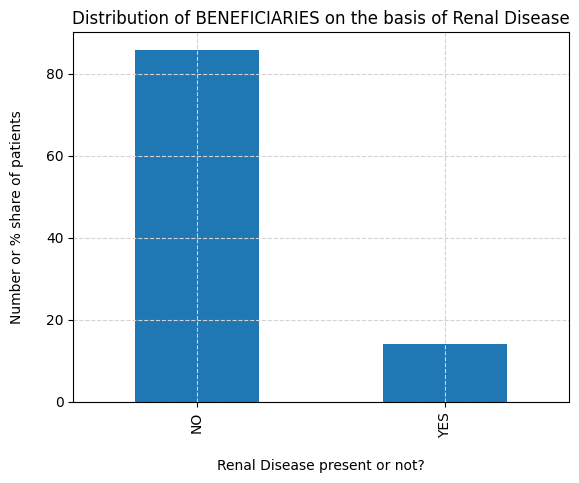

In [73]:
(train_bene_df['RenalDiseaseIndicator'].value_counts(normalize=True)*100).plot(kind='bar')

plt.title('Distribution of BENEFICIARIES on the basis of Renal Disease')
plt.xlabel("\nRenal Disease present or not?")
plt.xticks(labels=["NO","YES"], ticks=[0,1])
plt.ylabel("Number or % share of patients\n")
plt.grid(which='major', linestyle="--", color='lightgrey')


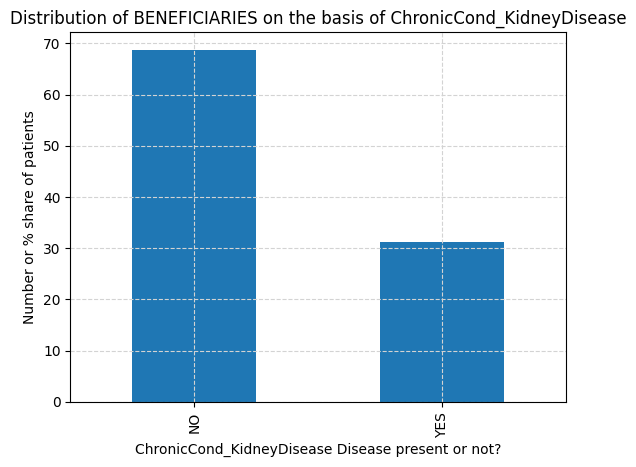

In [74]:
(train_bene_df['ChronicCond_KidneyDisease'].value_counts(normalize=True)*100).plot(kind='bar')

plt.title('Distribution of BENEFICIARIES on the basis of ChronicCond_KidneyDisease')
plt.xlabel("ChronicCond_KidneyDisease Disease present or not?")
plt.xticks(labels=["NO","YES"], ticks=[0,1])
plt.ylabel("Number or % share of patients")
plt.grid(which='major', linestyle="--", color='lightgrey')


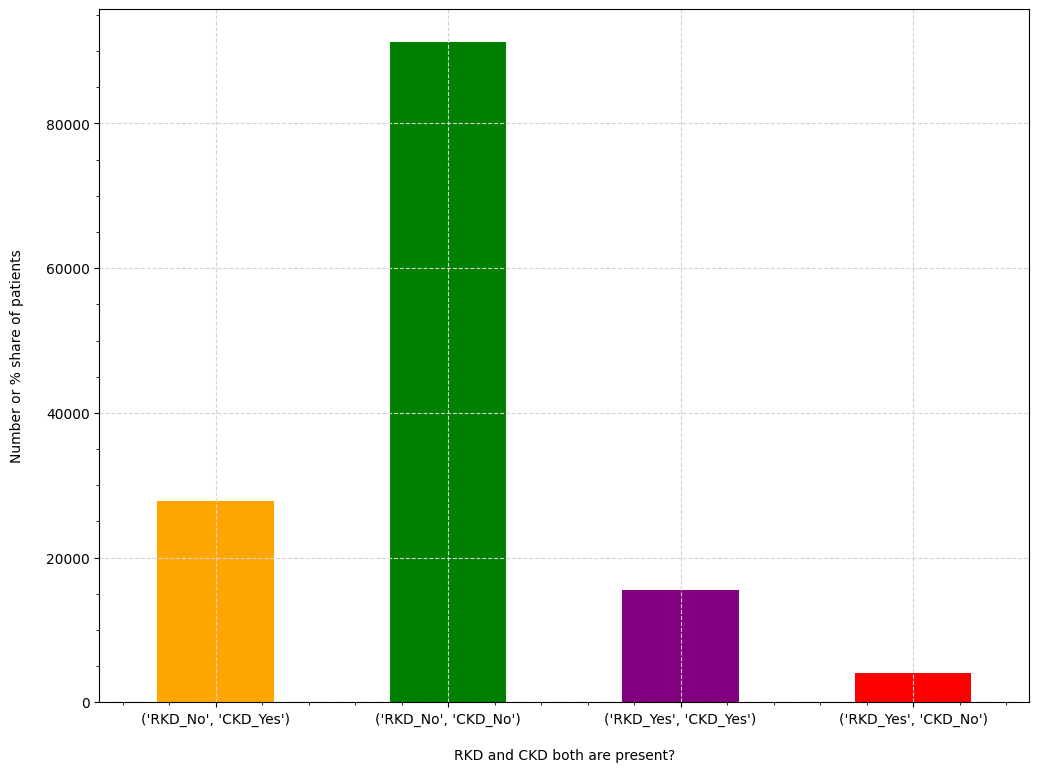

In [81]:
train_bene_df.groupby(['RenalDiseaseIndicator','ChronicCond_KidneyDisease'])['Gender'].count().plot(kind='bar', color=['orange','green','purple','red'], figsize=(12, 9))
plt.xlabel("\nRKD and CKD both are present?")
plt.xticks(labels=[("RKD_No","CKD_Yes"), ("RKD_No","CKD_No"), ("RKD_Yes","CKD_Yes"), ("RKD_Yes","CKD_No")], ticks=[0,1,2,3], rotation=0)
plt.ylabel("Number or % share of patients\n")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()


### 6. Number of Bene on the basis of state codes

Text(0, 0.5, 'Number or % share of patients\n')

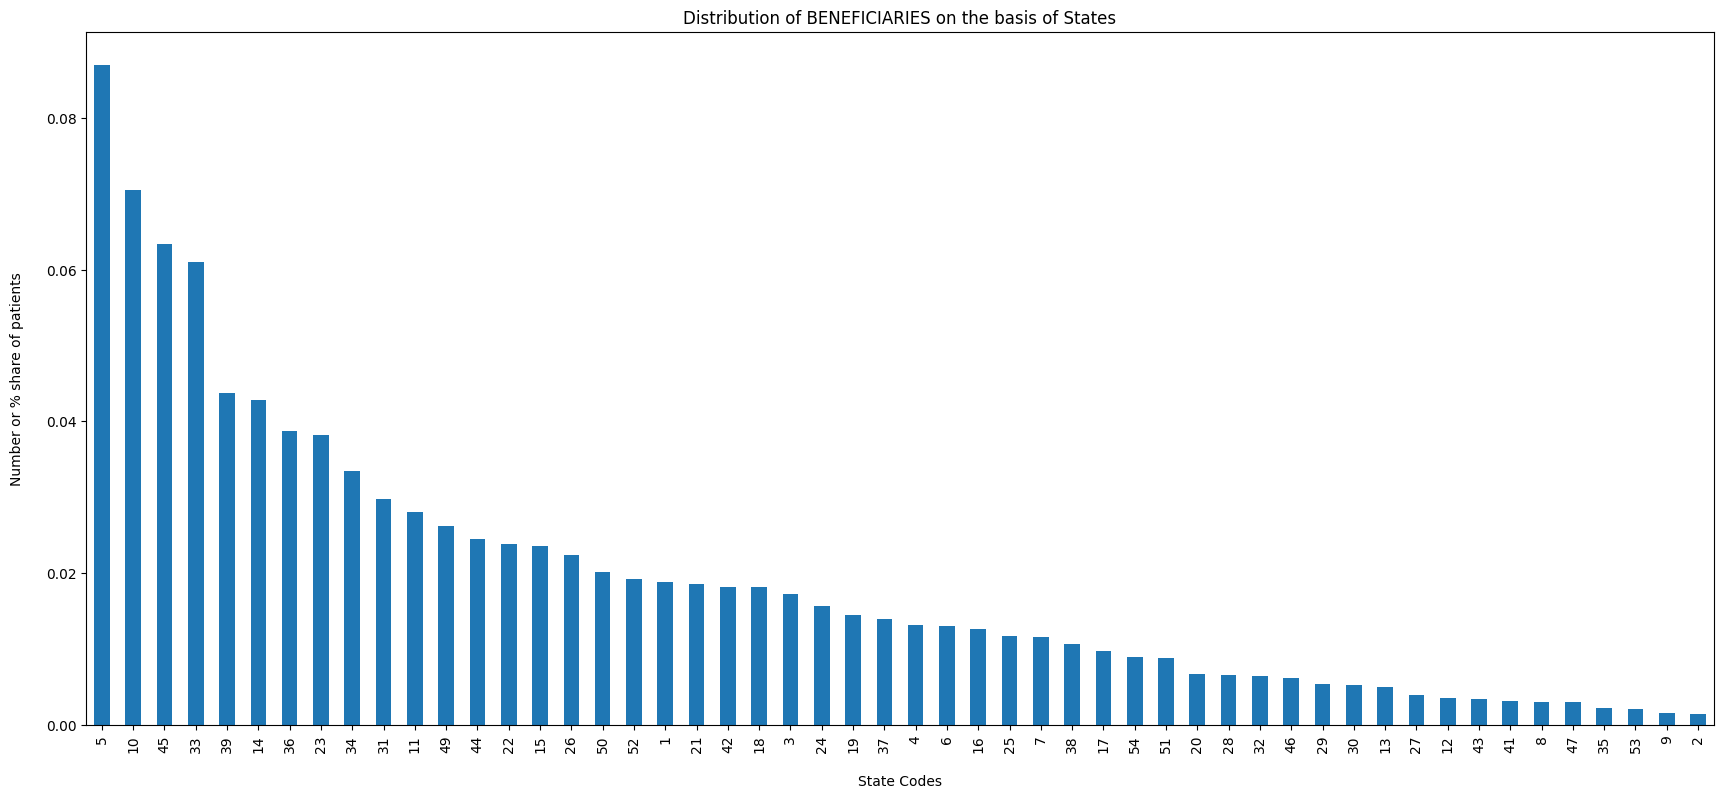

In [84]:
train_bene_df.State.value_counts(normalize=True).plot(kind='bar', figsize=(21, 9))
plt.title('Distribution of BENEFICIARIES on the basis of States')
plt.xlabel("\nState Codes")
plt.ylabel("Number or % share of patients\n")

### 7. Number of Bene on the basis of country codes

Text(0, 0.5, 'Number or % share of patients\n')

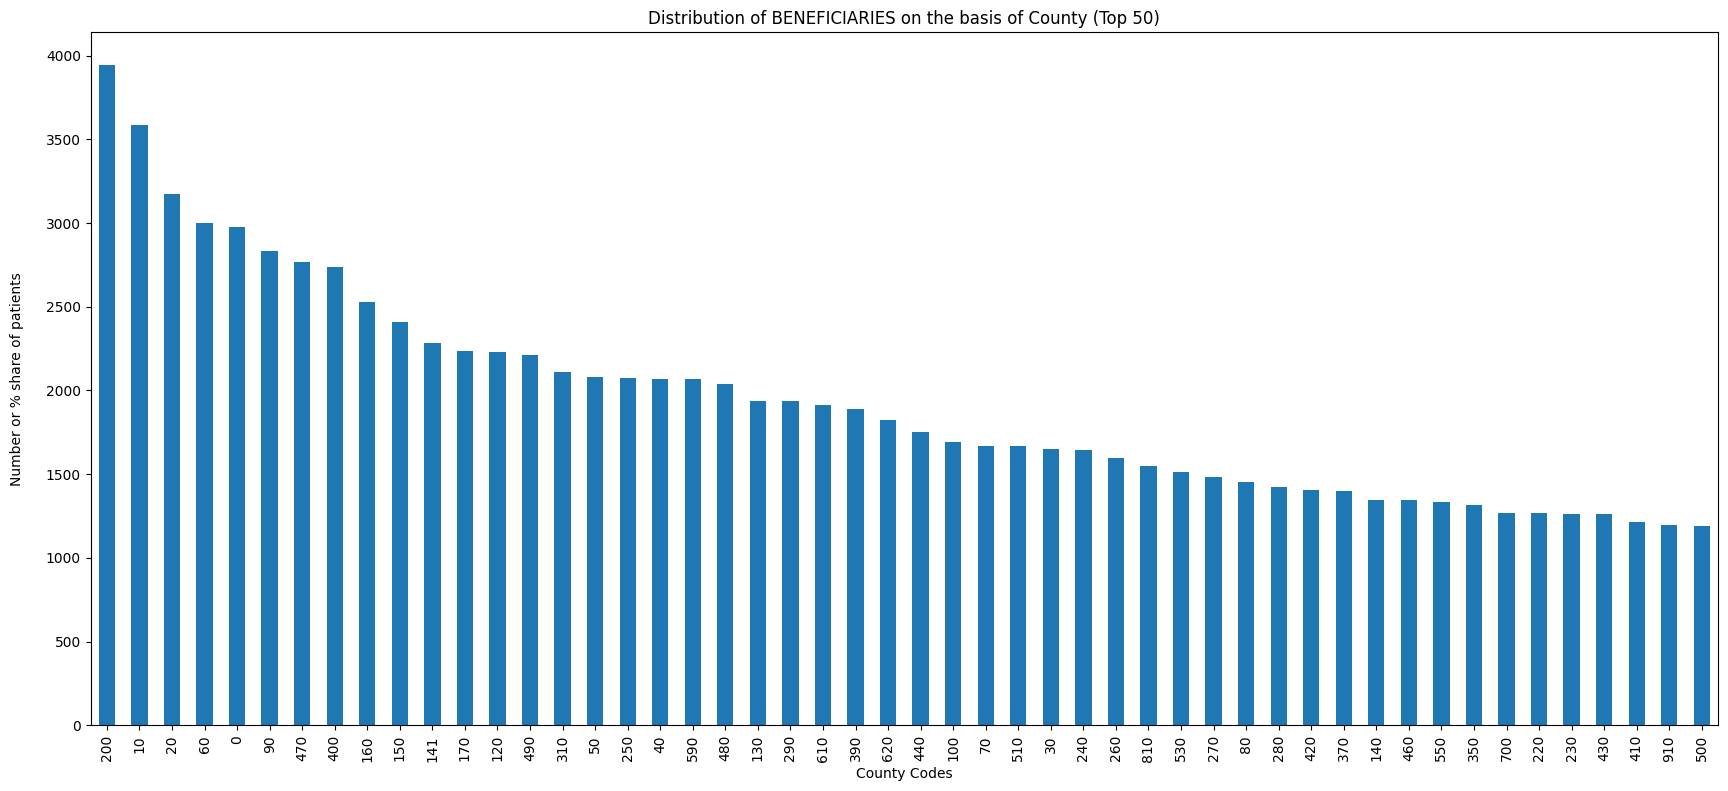

In [90]:
train_bene_df.County.value_counts()[:50].plot(kind='bar', figsize=(21, 9))
plt.title('Distribution of BENEFICIARIES on the basis of County (Top 50)')
plt.xlabel("County Codes")
plt.ylabel("Number or % share of patients\n")

### 8.1 number of beneficiaries on the basis of 'NoOfMonths_PartACov'

<Axes: xlabel='NoOfMonths_PartACov'>

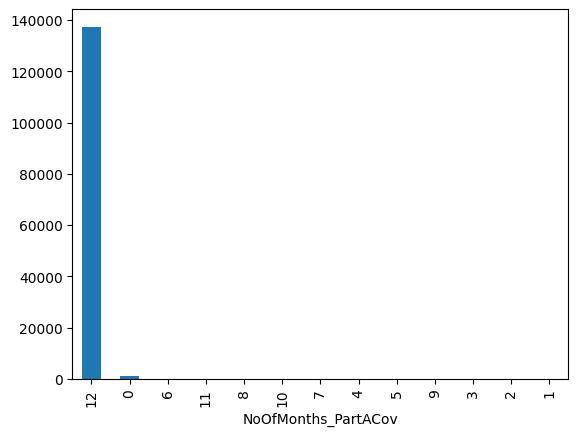

In [92]:
train_bene_df['NoOfMonths_PartACov'].value_counts().plot(kind='bar')

### 8.2 number of beneficiaries on the basis of 'NoOfMonths_PartBCov'

<Axes: xlabel='NoOfMonths_PartBCov'>

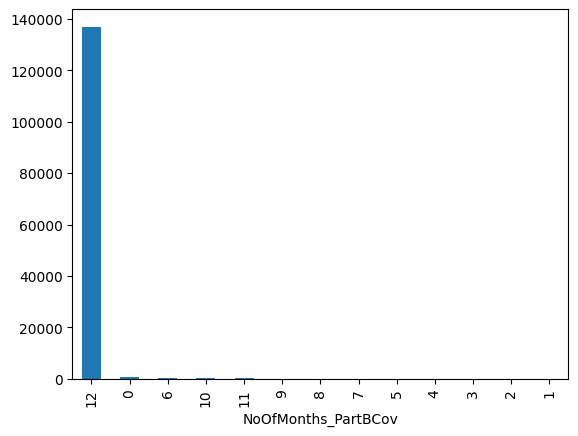

In [93]:
train_bene_df['NoOfMonths_PartBCov'].value_counts().plot(kind='bar')

Note: From the above plots, we can see  99% patients have coverage for 12 months

### 9. Number of Bene on the basis of 'ChronicCond_Alzheimer'

([<matplotlib.axis.XTick at 0x252ba156170>,
 [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

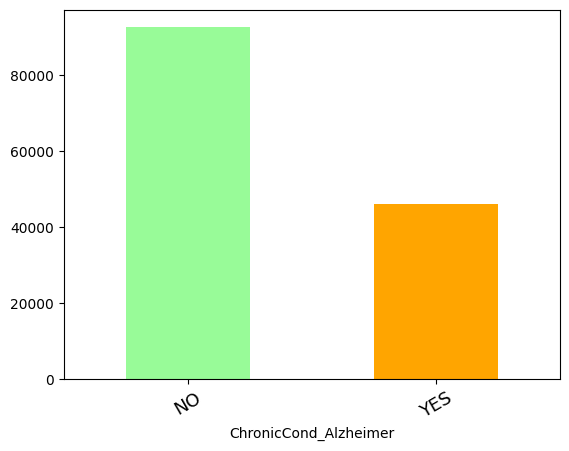

In [95]:
train_bene_df['ChronicCond_Alzheimer'].value_counts().plot(kind='bar', color=['palegreen','orange'])
plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)

## IP and OP Data - EDA

In [98]:
# Load datasets
train_bene_df = pd.read_csv("../data/raw/train_beneficiary.csv")
train_ip_df = pd.read_csv("../data/raw/train_Inpatient.csv")
train_op_df = pd.read_csv("../data/raw/train_outpatient.csv")

In [99]:
train_ip_df.shape

(40474, 30)

In [101]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [102]:
train_op_df.shape

(517737, 27)

In [103]:
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


### patient medicated with/ without admission

In [104]:
ip_bene_unq = set(train_ip_df['BeneID'])
op_bene_unq = set(train_op_df['BeneID'])

In [105]:
len(ip_bene_unq), len(op_bene_unq)

(31289, 133980)

Number of patients either in OP or IP

In [107]:
both_ip_and_op = ip_bene_unq.intersection(op_bene_unq)
len(both_ip_and_op)

26713

In [113]:
only_in_patients = ip_bene_unq - op_bene_unq
len(only_in_patients)


4576

In [114]:
only_out_patients = op_bene_unq - ip_bene_unq
len(only_out_patients)


107267

In [116]:
patients_counts = pd.DataFrame([len(only_in_patients), len(only_out_patients)]).T
patients_counts.columns = ['Only In-patients', 'Only Out-patients']
patients_counts

,Only In-patients,Only Out-patients
0,4576,107267


In [117]:
tot_patients = len(only_in_patients) + len(only_out_patients)
tot_patients

111843

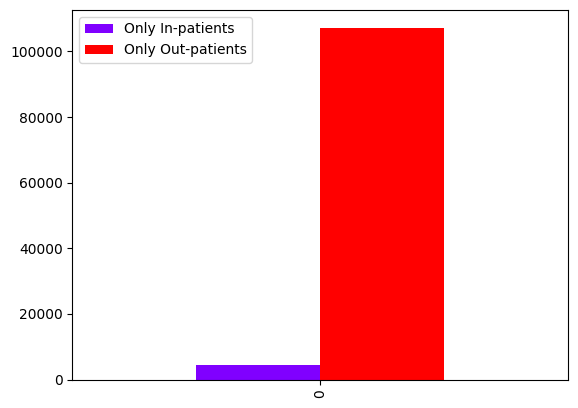

In [118]:
fig = patients_counts.plot(kind='bar',colormap='rainbow')


## EDA - IP Data

In [120]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


### Plotting null values with heatmap

Text(158.08159722222223, 0.5, 'Features Names\n')

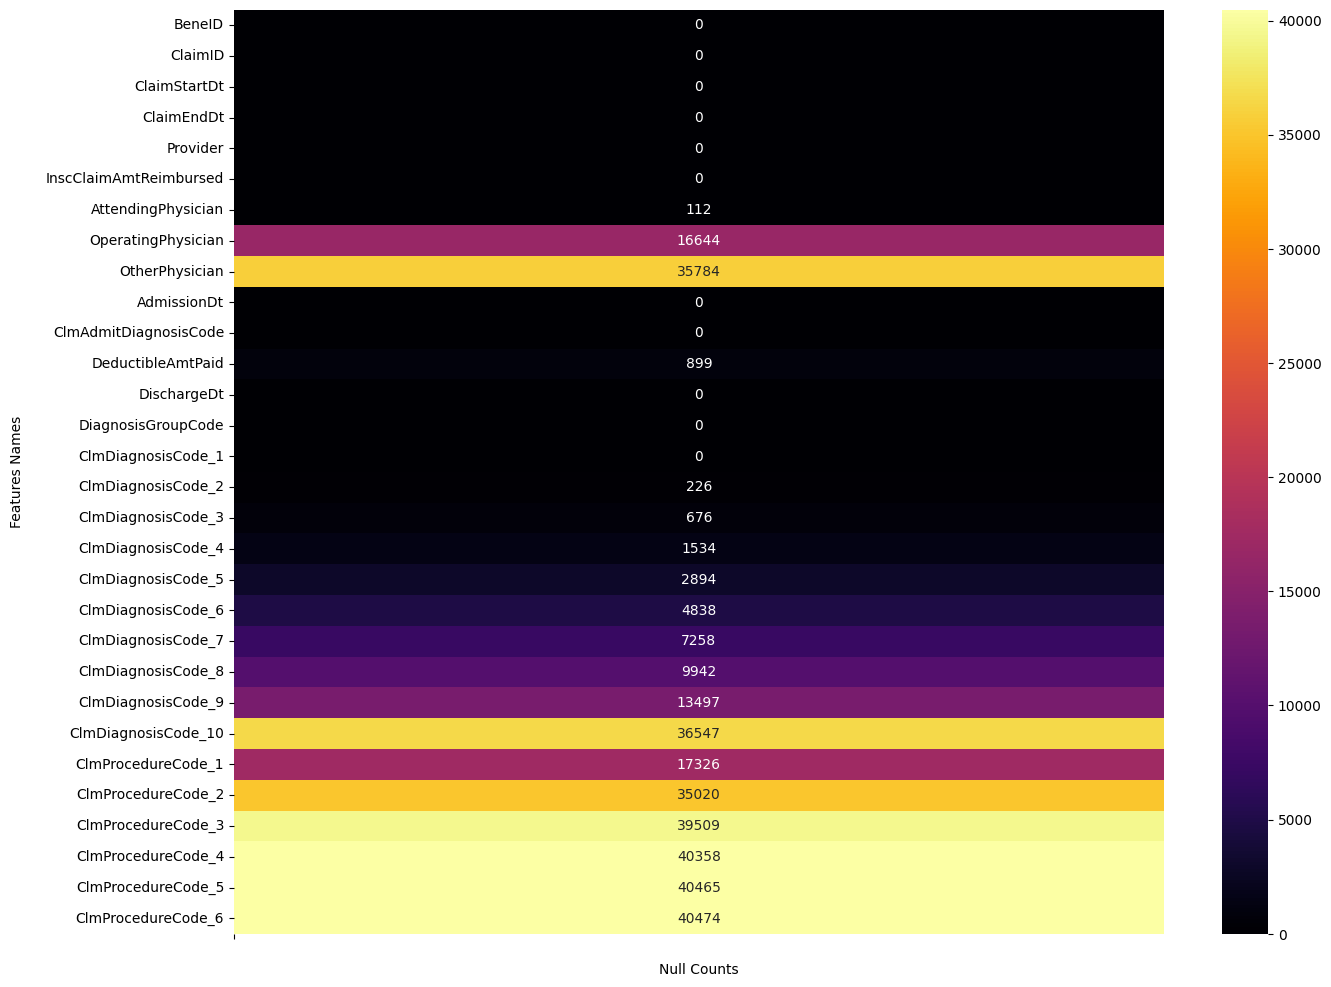

In [125]:
plt.figure(figsize=(15, 12))
fig = sns.heatmap(pd.DataFrame(train_ip_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
plt.xticks(labels=[" "], ticks=[0])
plt.xlabel("Null Counts")
plt.ylabel("Features Names\n")

- #### We can see many of the Claim Procedure Codes are null. And Claim Diagnosis Code 10 is rare  

- #### Added flag for indicating whether beneficiary admitted or not

In [126]:
train_ip_df['Admitted'] = 1

- #### Added claim duration feature

In [127]:
train_ip_df['ClaimStartDt'] = pd.to_datetime(train_ip_df['ClaimStartDt'], format="%Y-%m-%d")
train_ip_df['ClaimEndDt'] = pd.to_datetime(train_ip_df['ClaimEndDt'], format="%Y-%m-%d")

In [128]:
train_ip_df['Claim_Duration'] = (train_ip_df['ClaimEndDt'] - train_ip_df['ClaimStartDt']).dt.days

In [129]:
train_ip_df.Claim_Duration.describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

Text(0.5, 1.0, 'Distribution of Claim Duration Days')

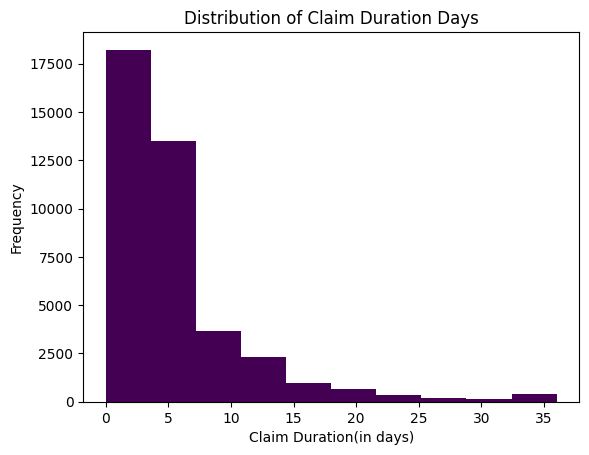

In [130]:
train_ip_df['Claim_Duration'].plot(kind='hist', colormap="viridis")
plt.xlabel("Claim Duration(in days)")
plt.title("Distribution of Claim Duration Days")

- #### Majority of the claims were filed for less than 10 days

### 1. What is the relation between reimbursement amount vs claim duration?

In [136]:
tot_claims_filed_for_specific_days = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['BeneID'].count())
tot_claims_filed_for_specific_days.head(10)

,BeneID
Claim_Duration,
0,605
1,4599
2,6119
3,6899
4,4993
5,3579
6,2714
7,2210
8,1612


In [137]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations.head(10)

,InscClaimAmtReimbursed
Claim_Duration,
0,3925000
1,33356000
2,43987610
3,56477460
4,43932690
5,33962440
6,29057610
7,25537200
8,20637600


In [138]:
claim_duration_stats = (train_ip_df
    .groupby('Claim_Duration')
    .agg(
        num_claims=('BeneID', 'count'),
        total_reimbursed=('InscClaimAmtReimbursed', 'sum'),
        avg_reimbursed=('InscClaimAmtReimbursed', 'mean')
    )
    .reset_index()
)


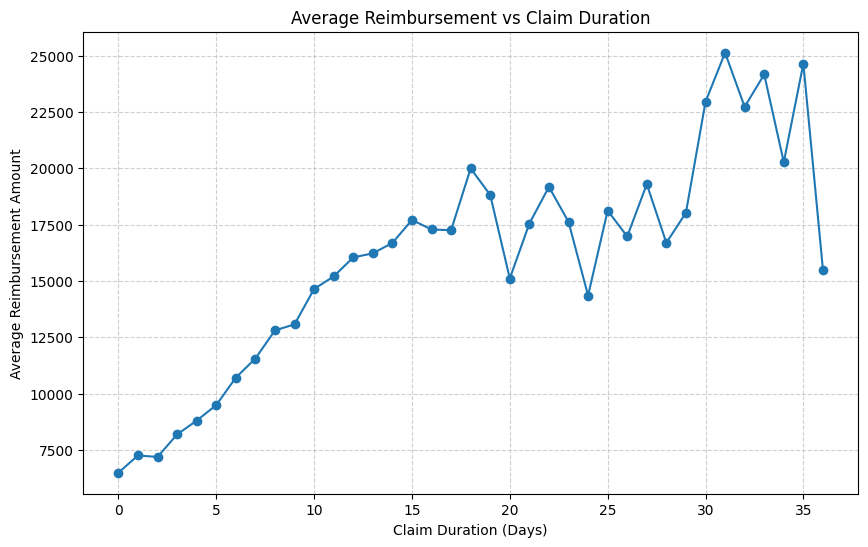

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(
    claim_duration_stats['Claim_Duration'],
    claim_duration_stats['avg_reimbursed'],
    marker='o'
)

plt.xlabel("Claim Duration (Days)")
plt.ylabel("Average Reimbursement Amount")
plt.title("Average Reimbursement vs Claim Duration")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


- #### Between 30 to 35 days the average claim reimbursement amount is too high

- ### 2. What is the relationship b/w Claimed and Admitted Durations with Re-imbursed Amount?

In [141]:
train_ip_df['DischargeDt'] = pd.to_datetime(train_ip_df['DischargeDt'], format="%Y-%m-%d")
train_ip_df['AdmissionDt'] = pd.to_datetime(train_ip_df['AdmissionDt'], format="%Y-%m-%d")

In [142]:
train_ip_df['Admitted_Days'] = train_ip_df['DischargeDt'] - train_ip_df['AdmissionDt']
train_ip_df['Admitted_Days'] = train_ip_df['Admitted_Days'].dt.days

In [144]:
claims_with_diff_admitted_and_claimed_dur = train_ip_df[~(train_ip_df['Claim_Duration'] == train_ip_df['Admitted_Days'])]
claims_with_diff_admitted_and_claimed_dur.shape

(49, 33)

- #### So there are 49 claims for which Claimed Duration and Admitted Duration are different. This is ok if the Claimed Dur < Admitted Dur, not otherwise. Lets check...

In [145]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted,Claim_Duration,Admitted_Days
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,1,9,6
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,NaN,5369.0,NaN,NaN,NaN,NaN,NaN,1,11,9
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,27801,3712.0,NaN,NaN,NaN,NaN,NaN,1,8,5
9094,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,7
9974,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,5
17060,BENE73681,CLM82213,2009-02-10,2009-02-21,PRV54354,11000,PHY397703,NaN,PHY390453,2009-02-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11,8
18267,BENE78133,CLM82210,2009-01-02,2009-01-05,PRV53461,20000,PHY331754,PHY426843,NaN,2009-01-02,...,NaN,387.0,NaN,NaN,NaN,NaN,NaN,1,3,1
21298,BENE88968,CLM82205,2009-02-23,2009-02-28,PRV52045,24000,PHY339550,PHY359571,NaN,2009-02-23,...,NaN,54.0,NaN,NaN,NaN,NaN,NaN,1,5,2
26395,BENE107828,CLM82216,2009-01-01,2009-01-22,PRV55018,19000,PHY364322,PHY320450,NaN,2009-01-01,...,486,5123.0,7850.0,NaN,NaN,NaN,NaN,1,21,18
27053,BENE110116,CLM82217,2009-02-09,2009-03-17,PRV56268,20000,PHY400645,PHY408610,NaN,2009-02-09,...,NaN,3950.0,NaN,NaN,NaN,NaN,NaN,1,36,35


- #### So for 17 out of 49 claims, the claimed dur > admitted dur, which may be case of fraud or could be human error also

- ### 3. What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?

In [147]:
provider_tot_claims_filed = pd.DataFrame(train_ip_df.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_ip_df['InscClaimAmtReimbursed'].sum()) * 100, 3)

provider_max_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
0,PRV51001,5,97000,0.024,42000,55000
1,PRV51003,62,573000,0.140,57000,516000
2,PRV51007,3,19000,0.005,10000,9000
3,PRV51008,2,25000,0.006,21000,4000
4,PRV51011,1,5000,0.001,5000,0


In [ ]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])


In [150]:
prv_tot_filed_claims_tot_max_reimb_amt.head(20)

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
574,PRV52518,1,57000,0.014,57000,0
578,PRV52537,1,57000,0.014,57000,0
1767,PRV56664,1,57000,0.014,57000,0
1883,PRV57080,1,57000,0.014,57000,0
2012,PRV57399,1,57000,0.014,57000,0
1970,PRV57290,2,55000,0.013,55000,0
305,PRV51681,1,51000,0.012,51000,0
637,PRV52804,1,36000,0.009,36000,0
286,PRV51626,1,35000,0.009,35000,0
11,PRV51035,1,29000,0.007,29000,0


- #### The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed. This, can be a potential sign of fraudulent

## EDA - OP Data

In [151]:
train_op_df.shape

(517737, 27)

- #### Checking for nulls

[]

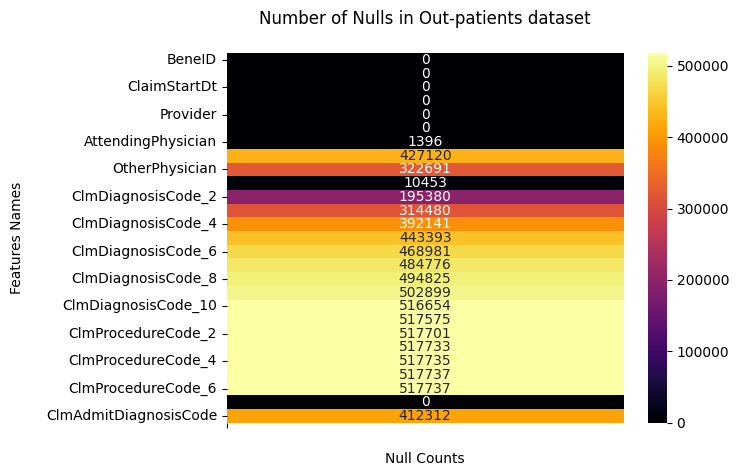

In [153]:
fig = sns.heatmap(pd.DataFrame(train_op_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
plt.xlabel("Null Counts")
plt.ylabel("Features Names\n")
plt.xticks(labels=[" "], ticks=[0])
plt.title("Number of Nulls in Out-patients dataset\n")
plt.plot()


- #### Most of the procedure codes are null

- #### Adding flag for indicating Bene admitted or not?

In [154]:
train_op_df['Admitted'] = 0

- #### Adding claim duration

In [155]:
train_op_df['ClaimStartDt'] = pd.to_datetime(train_op_df['ClaimStartDt'], format="%Y-%m-%d")
train_op_df['ClaimEndDt'] = pd.to_datetime(train_op_df['ClaimEndDt'], format="%Y-%m-%d")

In [156]:
train_op_df['Claim_Duration'] = (train_op_df['ClaimEndDt'] - train_op_df['ClaimStartDt']).dt.days

In [157]:
train_op_df['Claim_Duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

Text(0.5, 1.0, 'Distribution of Claim Duration Days\n')

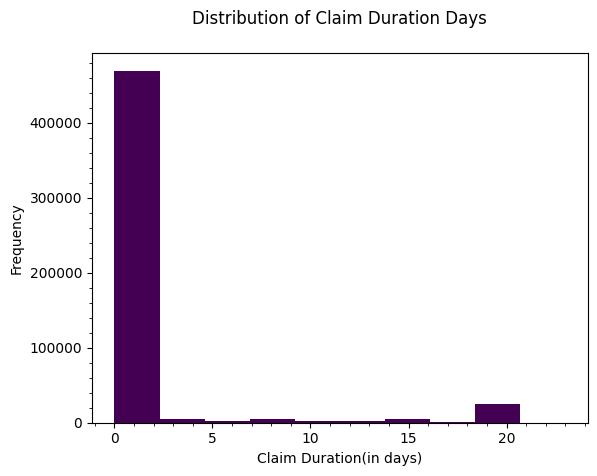

In [158]:
train_op_df['Claim_Duration'].plot(kind='hist', colormap="viridis");
plt.xlabel("Claim Duration(in days)")
plt.minorticks_on()
plt.title("Distribution of Claim Duration Days\n")

### 4. What is the Relationship b/w claim duration and reimbursement amount

C:\Users\Koushik\AppData\Local\Temp\ipykernel_16344\2681765829.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=train_op_df, palette="plasma")


[]

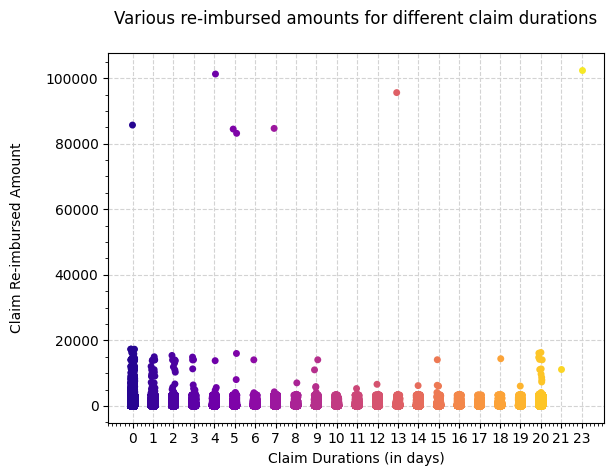

In [159]:
sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=train_op_df, palette="plasma")
plt.xlabel("Claim Durations (in days)")
plt.ylabel("Claim Re-imbursed Amount\n")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Various re-imbursed amounts for different claim durations\n")
plt.plot()

- #### So majority of the claim amounts are under 20k but few have more than 100k

### 5. Relation between copay and claim duration

C:\Users\Koushik\AppData\Local\Temp\ipykernel_16344\427073146.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Claim_Duration", y="DeductibleAmtPaid", data=train_op_df, palette="plasma")


[]

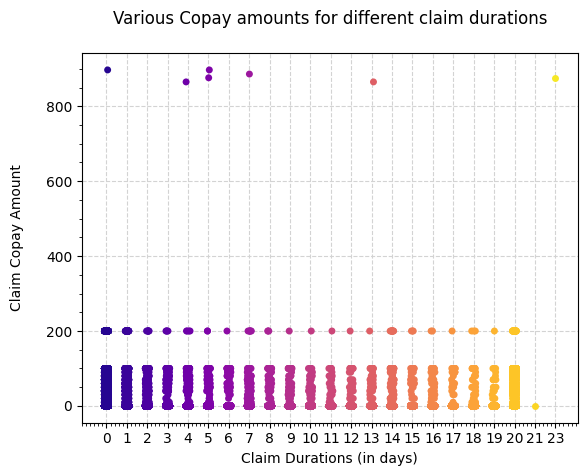

In [160]:
sns.stripplot(x="Claim_Duration", y="DeductibleAmtPaid", data=train_op_df, palette="plasma")
plt.xlabel("Claim Durations (in days)")
plt.ylabel("Claim Copay Amount\n")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Various Copay amounts for different claim durations\n")
plt.plot()

### 6. What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?

In [161]:
provider_tot_claims_filed = pd.DataFrame(train_op_df.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(train_op_df.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_op_df['InscClaimAmtReimbursed'].sum()) * 100, 3)

provider_max_reimbursed_amt = pd.DataFrame(train_op_df.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
0,PRV51001,20,7640,0.005,1500,6140
1,PRV51003,70,32670,0.022,3300,29370
2,PRV51004,149,52170,0.035,3300,48870
3,PRV51005,1165,280910,0.189,4080,276830
4,PRV51007,69,14710,0.010,3300,11410


In [162]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])

In [163]:
prv_tot_filed_claims_tot_max_reimb_amt.head(20)

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
82,PRV51119,1,95580,0.064,95580,0
2480,PRV54295,1,3300,0.002,3300,0
2485,PRV54302,1,3300,0.002,3300,0
3307,PRV55456,1,3300,0.002,3300,0
433,PRV51577,1,2100,0.001,2100,0
1473,PRV52954,1,2100,0.001,2100,0
4326,PRV56819,1,1900,0.001,1900,0
5010,PRV57762,1,1900,0.001,1900,0
521,PRV51689,1,1700,0.001,1700,0
3430,PRV55610,1,1700,0.001,1700,0


- #### The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed. This, can be a potential sign of fraudulent

## EDA - Entire Data

In [165]:
# Load datasets
train_bene_df = pd.read_csv("../data/raw/train_beneficiary.csv")
train_ip_df = pd.read_csv("../data/raw/train_Inpatient.csv")
train_op_df = pd.read_csv("../data/raw/train_outpatient.csv")
train_tgt_lbls_df = pd.read_csv("../data/raw/train.csv")

In [166]:
train_tgt_lbls_df.shape

(5410, 2)

Text(0.5, 1.0, 'Distribution of Fraud & Non-fraud providers\n')

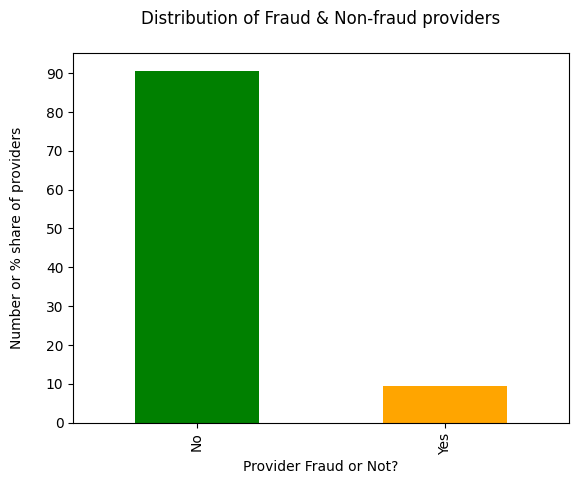

In [169]:
fig = (train_tgt_lbls_df["PotentialFraud"].value_counts(normalize=True)*100).plot(kind='bar', color=['green','orange'])
plt.xlabel("Provider Fraud or Not?")
plt.ylabel("Number or % share of providers\n")
plt.yticks(np.arange(0,100,10))
plt.title("Distribution of Fraud & Non-fraud providers\n")

In [170]:
train_ip_df["Admitted?"] = 1
train_op_df["Admitted?"] = 0

- ### Merging the datasets

In [171]:
# Commom columns must be 28
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [172]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [173]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

In [174]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

- #### Number of unique providers

In [177]:
train_iobp_df["Provider"].nunique()

5410

- #### Number of unique Claims

In [176]:
train_iobp_df["ClaimID"].nunique()

558211

In [178]:
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


- #### The above situation is a problem; one provider may provide multiple claims but it is wrong to say that all of the claims are fraud if one of the claims turns out to be fraud

- #### Fraud counts at claims level

[]

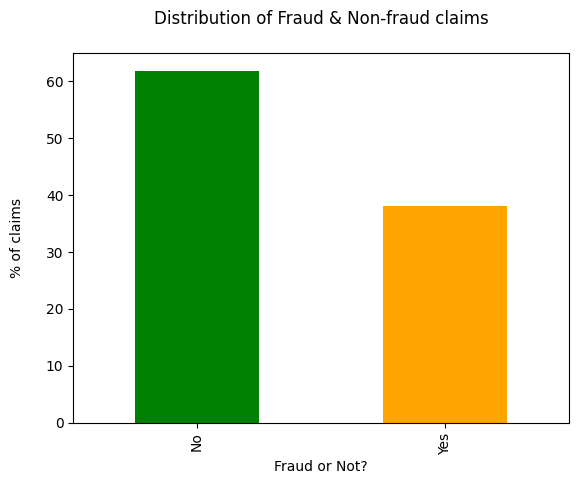

In [181]:
fig = (train_iobp_df['PotentialFraud'].value_counts(normalize=True)*100).plot(kind='bar', color=['green','orange'])

plt.xlabel("Fraud or Not?")
plt.ylabel("% of claims\n")
plt.title("Distribution of Fraud & Non-fraud claims\n")
plt.plot()